# Uploading Data and Exploring


In [426]:
import pandas as pd
import numpy as np

# Load the dataset
path = '../data/raw/fraud-dataset-raw.csv'
df = pd.read_csv(path)
df.head()

,Dummy Policy No,ASSURED_AGE,NOMINEE_RELATION,OCCUPATION,POLICY SUMASSURED,Premium,PREMIUMPAYMENTMODE,Annual Income,HOLDERMARITALSTATUS,INDIV_REQUIREMENTFLAG,...,CORRESPONDENCEPOSTCODE,Product Type,CHANNEL,Bank code,POLICYRISKCOMMENCEMENTDATE,Date of Death,INTIMATIONDATE,STATUS,SUB_STATUS,Fraud Category
0,1,20,Mother,Service,"1,200,000","120,000",Quarterly,"420,000",Single,Non Medical,...,816115,ULIP,Retail Agency,NaN,30-08-2023,26-10-2023,12-12-2023,Claim,Death Claim Repudiated,Misrepresentation
1,2,33,Husband,Service,"350,000","5,000",Yearly,"180,000",Married,Non Medical,...,464001,Traditional,Retail Agency,NaN,02-03-2022,31-03-2022,10-02-2023,Claim,Death Claim Repudiated,Misrepresentation
2,3,34,Wife,Self-Employed,"350,000","5,000",Yearly,"249,000",Married,Non Medical,...,731238,Traditional,Retail Agency,NaN,08-07-2022,11-11-2022,26-06-2023,Claim,Death Claim Repudiated,Misrepresentation
3,4,34,Wife,Service,"325,000","5,000",Yearly,"360,000",Married,Non Medical,...,281504,Traditional,Retail Agency,NaN,27-12-2022,08-04-2023,14-08-2023,Claim,Death Claim Repudiated,Misrepresentation
4,5,54,Husband,Housewife,"100,000","5,000",Yearly,"600,000",Married,Non Medical,...,606001,Traditional,Retail Agency,NaN,24-03-2023,11-04-2023,06-12-2023,Claim,Death Claim Repudiated,Misrepresentation


# Pre Processing Data

## Clean Columns with Non-Numeric Values

In [427]:


# Display initial dataset info
print("Initial Dataset Info:")
print(df.info())

# Step 1: Clean financial columns (convert to numeric, handle commas)
financial_columns = ['POLICY SUMASSURED', 'Premium', 'Annual Income']

for col in financial_columns:
    # Convert to numeric, handling mixed data
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# Step 2: Drop irrelevant columns
columns_to_drop = [
    'Dummy Policy No', 'CORRESPONDENCECITY', 'CORRESPONDENCESTATE', 'CORRESPONDENCEPOSTCODE', 
    'POLICYRISKCOMMENCEMENTDATE', 'Date of Death', 'INTIMATIONDATE', 'STATUS', 'SUB_STATUS'
]
df = df.drop(columns=columns_to_drop)



Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dummy Policy No             1321 non-null   int64  
 1   ASSURED_AGE                 1321 non-null   int64  
 2   NOMINEE_RELATION            1321 non-null   object 
 3   OCCUPATION                  1321 non-null   object 
 4   POLICY SUMASSURED           1321 non-null   object 
 5   Premium                     1321 non-null   object 
 6   PREMIUMPAYMENTMODE          1321 non-null   object 
 7   Annual Income               1321 non-null   object 
 8   HOLDERMARITALSTATUS         1321 non-null   object 
 9   INDIV_REQUIREMENTFLAG       1321 non-null   object 
 10  Policy Term                 1321 non-null   int64  
 11  Policy Payment Term         1321 non-null   int64  
 12  CORRESPONDENCECITY          1321 non-null   object 
 13  CORRESPONDE

## Handling Missing Values

In [428]:
# Step 3: Handle missing values
df['Bank code'] = df['Bank code'].fillna(-1)  # Replace NaNs with -1 in 'Bank code'
df = df.fillna(df.median(numeric_only=True))  # Replace other NaNs in numerical columns with median


## Encoding Categorial Variables

In [429]:
# Step 4: Encode categorical columns
categorical_columns = [
    'NOMINEE_RELATION', 'OCCUPATION', 'PREMIUMPAYMENTMODE', 
    'HOLDERMARITALSTATUS', 'INDIV_REQUIREMENTFLAG', 
    'Product Type', 'CHANNEL', 'Fraud Category'
]
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))


## Normalize Numerical Data

In [430]:
from sklearn.preprocessing import MinMaxScaler  # Ensure this import is present

# Step 5: Normalize numerical features
numerical_columns = ['ASSURED_AGE', 'POLICY SUMASSURED', 'Premium', 'Annual Income', 
                     'Policy Term', 'Policy Payment Term', 'Bank code']

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display cleaned dataset info
print("\nCleaned Dataset Info:")
print(df.info())

print("\nSample cleaned data:")
print(df.head())




Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ASSURED_AGE            1321 non-null   float64
 1   NOMINEE_RELATION       1321 non-null   int64  
 2   OCCUPATION             1321 non-null   int64  
 3   POLICY SUMASSURED      1321 non-null   float64
 4   Premium                1321 non-null   float64
 5   PREMIUMPAYMENTMODE     1321 non-null   int64  
 6   Annual Income          1321 non-null   float64
 7   HOLDERMARITALSTATUS    1321 non-null   int64  
 8   INDIV_REQUIREMENTFLAG  1321 non-null   int64  
 9   Policy Term            1321 non-null   float64
 10  Policy Payment Term    1321 non-null   float64
 11  Product Type           1321 non-null   int64  
 12  CHANNEL                1321 non-null   int64  
 13  Bank code              1321 non-null   float64
 14  Fraud Category         1321 non-n

In [431]:
df.head()

,ASSURED_AGE,NOMINEE_RELATION,OCCUPATION,POLICY SUMASSURED,Premium,PREMIUMPAYMENTMODE,Annual Income,HOLDERMARITALSTATUS,INDIV_REQUIREMENTFLAG,Policy Term,Policy Payment Term,Product Type,CHANNEL,Bank code,Fraud Category
0,0.232877,6,11,0.034286,0.011852,2,0.000363,1,1,0.066667,1.0,4,3,0.0,8
1,0.410959,5,11,0.010000,0.000350,4,0.000131,0,1,0.133333,1.0,3,3,0.0,8
2,0.424658,12,10,0.010000,0.000350,4,0.000198,0,1,0.133333,1.0,3,3,0.0,8
3,0.424658,12,11,0.009286,0.000350,4,0.000305,0,1,0.066667,1.0,3,3,0.0,8
4,0.698630,5,6,0.002857,0.000350,4,0.000538,0,1,0.133333,1.0,3,3,0.0,8


# Train Model with XGBoost

Best Parameters: (0.1, 5, 100, 0.8, 0.8)
Best Accuracy Score: 0.8603773584905661
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.17      0.33      0.22         3
           2       0.77      0.79      0.78        47
           3       0.14      0.33      0.20         3
           4       0.93      0.95      0.94       198
           5       1.00      0.14      0.25         7
           6       0.00      0.00      0.00         3

    accuracy                           0.86       265
   macro avg       0.43      0.36      0.34       265
weighted avg       0.86      0.86      0.85       265



/home/ritika-jain/miniconda3/envs/fraud-detection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ritika-jain/miniconda3/envs/fraud-detection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ritika-jain/miniconda3/envs/fraud-detection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

<Figure size 1000x800 with 0 Axes>

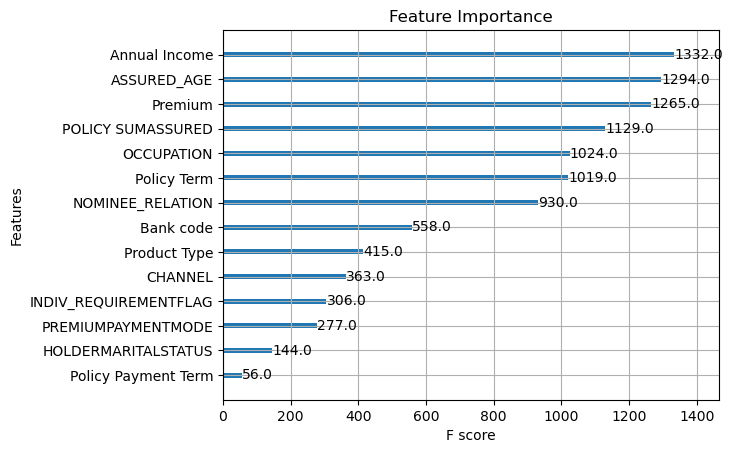

In [432]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import itertools
import matplotlib.pyplot as plt

# Step 1: Group Fraud Categories with less than 3% occurrence as "Miscellaneous"
threshold = 0.007 * len(df)  # 3% of total data
fraud_counts = df['Fraud Category'].value_counts()

# Identify rare categories
rare_categories = fraud_counts[fraud_counts < threshold].index

# Create a new column with grouped fraud categories
df['Fraud Category Grouped'] = df['Fraud Category'].apply(
    lambda x: 'Miscellaneous' if x in rare_categories else f'Category_{x}'
)

# Step 2: Prepare Features and Target
X = df.drop(columns=['Fraud Category', 'Fraud Category Grouped'])  # Drop original and grouped target
y = df['Fraud Category Grouped']

# Step 3: Ensure Uniform Data Type and Encode the Target Variable
df['Fraud Category Grouped'] = df['Fraud Category Grouped'].astype(str)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Fraud Category Grouped'])

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 5: Balance the Dataset with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 6: Define Manual Grid Search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [50, 100],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Generate all combinations of parameters
param_combinations = list(itertools.product(
    param_grid['learning_rate'],
    param_grid['max_depth'],
    param_grid['n_estimators'],
    param_grid['subsample'],
    param_grid['colsample_bytree']
))

best_model = None
best_score = 0
best_params = None

# Step 7: Perform Manual Grid Search
for params in param_combinations:
    learning_rate, max_depth, n_estimators, subsample, colsample_bytree = params
    model = xgb.XGBClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        n_estimators=n_estimators,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        objective='multi:softmax',
        eval_metric='mlogloss',
        random_state=42
    )
    
    # Fit the model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    # Update the best model if the score improves
    if score > best_score:
        best_score = score
        best_model = model
        best_params = params

# Step 8: Display Results
print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Evaluate the best model
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Feature Importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_model)
plt.title('Feature Importance')
plt.show()


In [433]:
import joblib

# Save the trained model as a .joblib file
joblib.dump(best_model, "fraud-detection-model.joblib")

print("Model saved")


Model saved


In [434]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

def preprocess_data(df):
    """
    Preprocesses the dataset for model training or inference.

    Args:
    df (pd.DataFrame): Raw dataset.

    Returns:
    pd.DataFrame: Processed dataset ready for modeling.
    """
    # Step 1: Clean financial columns
    financial_columns = ['POLICY SUMASSURED', 'Premium', 'Annual Income']
    for col in financial_columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

    # Step 2: Drop irrelevant columns
    columns_to_drop = [
        'Dummy Policy No', 'CORRESPONDENCECITY', 'CORRESPONDENCESTATE', 'CORRESPONDENCEPOSTCODE',
        'POLICYRISKCOMMENCEMENTDATE', 'Date of Death', 'INTIMATIONDATE', 'STATUS', 'SUB_STATUS'
    ]
    df = df.drop(columns=columns_to_drop)

    # Step 3: Handle missing values
    df['Bank code'] = df['Bank code'].fillna(-1)  # Replace NaNs with -1 in 'Bank code'
    df = df.fillna(df.median(numeric_only=True))  # Replace other NaNs in numerical columns with median

    # Step 4: Encode categorical columns
    categorical_columns = [
        'NOMINEE_RELATION', 'OCCUPATION', 'PREMIUMPAYMENTMODE',
        'HOLDERMARITALSTATUS', 'INDIV_REQUIREMENTFLAG',
        'Product Type', 'CHANNEL', 'Fraud Category'
    ]
    label_encoders = {}
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col].astype(str))
    
    # Save label encoders for later use
    joblib.dump(label_encoders, 'label_encoders.pkl')

    # Step 5: Normalize numerical features
    numerical_columns = ['ASSURED_AGE', 'POLICY SUMASSURED', 'Premium', 'Annual Income',
                         'Policy Term', 'Policy Payment Term', 'Bank code']
    scaler = MinMaxScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    # Save scaler for later use
    joblib.dump(scaler, 'scaler.pkl')

    return df


In [439]:
# Load raw data from a CSV file
raw_df = pd.read_csv('../data/raw/fraud-dataset-raw.csv')

# Call preprocess_data function
processed_df = preprocess_data(raw_df)

# Display processed data
print(processed_df.head())
raw_df

   ASSURED_AGE  NOMINEE_RELATION  OCCUPATION  POLICY SUMASSURED   Premium  \
0     0.232877                 6          11           0.034286  0.011852   
1     0.410959                 5          11           0.010000  0.000350   
2     0.424658                12          10           0.010000  0.000350   
3     0.424658                12          11           0.009286  0.000350   
4     0.698630                 5           6           0.002857  0.000350   

   PREMIUMPAYMENTMODE  Annual Income  HOLDERMARITALSTATUS  \
0                   2       0.000363                    1   
1                   4       0.000131                    0   
2                   4       0.000198                    0   
3                   4       0.000305                    0   
4                   4       0.000538                    0   

   INDIV_REQUIREMENTFLAG  Policy Term  Policy Payment Term  Product Type  \
0                      1     0.066667                  1.0             4   
1                 

,Dummy Policy No,ASSURED_AGE,NOMINEE_RELATION,OCCUPATION,POLICY SUMASSURED,Premium,PREMIUMPAYMENTMODE,Annual Income,HOLDERMARITALSTATUS,INDIV_REQUIREMENTFLAG,...,CORRESPONDENCEPOSTCODE,Product Type,CHANNEL,Bank code,POLICYRISKCOMMENCEMENTDATE,Date of Death,INTIMATIONDATE,STATUS,SUB_STATUS,Fraud Category
0,1,20,Mother,Service,1200000,120000,Quarterly,420000,Single,Non Medical,...,816115,ULIP,Retail Agency,NaN,30-08-2023,26-10-2023,12-12-2023,Claim,Death Claim Repudiated,Misrepresentation
1,2,33,Husband,Service,350000,5000,Yearly,180000,Married,Non Medical,...,464001,Traditional,Retail Agency,NaN,02-03-2022,31-03-2022,10-02-2023,Claim,Death Claim Repudiated,Misrepresentation
2,3,34,Wife,Self-Employed,350000,5000,Yearly,249000,Married,Non Medical,...,731238,Traditional,Retail Agency,NaN,08-07-2022,11-11-2022,26-06-2023,Claim,Death Claim Repudiated,Misrepresentation
3,4,34,Wife,Service,325000,5000,Yearly,360000,Married,Non Medical,...,281504,Traditional,Retail Agency,NaN,27-12-2022,08-04-2023,14-08-2023,Claim,Death Claim Repudiated,Misrepresentation
4,5,54,Husband,Housewife,100000,5000,Yearly,600000,Married,Non Medical,...,606001,Traditional,Retail Agency,NaN,24-03-2023,11-04-2023,06-12-2023,Claim,Death Claim Repudiated,Misrepresentation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,1317,42,Spouse,Self-Employed,1750000,250000,Yearly,681600,Married,Non Medical,...,231216,ULIP,Bancassurance,1.0,-,-,-,Cancellation,Other Reason,Document Tampering
1317,1318,20,Son,Business,300000,15000,Yearly,200000,Single,Non Medical,...,473001,Variable,Bancassurance,7.0,20-03-2013,-,-,Maturity,Disinvested Unpaid,Misselling
1318,1319,54,Husband,Service,300000,15000,Yearly,1000000,Married,Non Medical,...,473001,Variable,Bancassurance,7.0,20-03-2013,-,-,Maturity,Disinvested Unpaid,Misselling
1319,1320,36,Daughter,Housewife,0,1000000,Single,1200000,widowed,Non Medical,...,121003,Pension,Bancassurance,1.0,19-09-2019,-,-,Inforce,-,Signature Forgery


In [436]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load("fraud-detection-model.joblib")

# Example of preprocessed data (already cleaned and ready to go)
# Make sure the columns are in the correct order as during training
new_data = [
0.7808219178082192,10,9,0.028542857142857144,0.009841476221433216,4,0.00041668483606358805,0,0,0.06666666666666667,0.0,4,3,0.0

]

# Create a DataFrame from the preprocessed data
feature_columns = [
    'ASSURED_AGE', 'NOMINEE_RELATION', 'OCCUPATION', 'POLICY SUMASSURED', 'Premium',
    'PREMIUMPAYMENTMODE', 'Annual Income', 'HOLDERMARITALSTATUS', 'INDIV_REQUIREMENTFLAG',
    'Policy Term', 'Policy Payment Term', 'Product Type', 'CHANNEL', 'Bank code'
]

new_data_df = pd.DataFrame([new_data], columns=feature_columns)

# Step 2: Make the prediction
prediction = model.predict(new_data_df)

# Output the prediction
print("Predicted Fraud Category:", prediction[0])


Predicted Fraud Category: 6
